In [63]:
import pandas as pd

df = pd.read_csv('/content/listings.csv')
display(df.head())

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,158.0,2,485,2025-05-25,2.50,1,266,40,STR-0006854
1,5858,Creative Sanctuary,8904,Philip Jonathon,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,250.0,30,110,2017-08-06,0.56,1,312,0,NaN
2,8014,female HOST quiet fast internet market parking,22402,Jia,NaN,Outer Mission,37.73077,-122.44827,Private room,62.0,4,89,2024-08-11,0.57,3,44,2,STR-0000974
3,8142,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,55.0,32,10,2023-07-30,0.08,20,306,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosmarie,NaN,Western Addition,37.77377,-122.43614,Entire home/apt,527.0,9,28,2019-06-28,0.15,1,364,0,STR-0000264


Number of rows: 7804
Number of columns: 18


In [64]:
display(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [65]:
display(df.price)

,price
0,158.0
1,250.0
2,62.0
3,55.0
4,527.0
...,...
7799,445.0
7800,76.0
7801,43.0
7802,60.0


In [66]:
null_prices_count = df['price'].isnull().sum()
print(f"Number of null values in the 'price' column: {null_prices_count}")

Number of null values in the 'price' column: 2039


In [67]:
df.dropna(subset=['price'], inplace=True)
print(f"Number of rows after dropping null prices: {df.shape[0]}")

Number of rows after dropping null prices: 5765


In [68]:
display(df.price)

,price
0,158.0
1,250.0
2,62.0
3,55.0
4,527.0
...,...
7799,445.0
7800,76.0
7801,43.0
7802,60.0


In [69]:
host_listings = df.groupby('host_id')['name'].apply(list)
display(host_listings)

,name
host_id,
1169,"[Bright, Modern Garden Unit - 1BR/1BTH]"
8904,[Creative Sanctuary]
10135,"[Spacious 1BR in Mission Victorian, Large 1BR ..."
10569,"[No Frills, Just Location – Heart of the Mission]"
11115,[Cozy Private One Bedroom with Kitchen]
...,...
698841455,[Welcome to your cozy home in San Francisco]
699045507,[Primary Suite In Historic Upper Nob Hill - Lo...
699186016,[Spacious Mission Condo Oasis]


In [70]:
display(df.head(30))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.770280,-122.433170,Entire home/apt,158.0,2,485,2025-05-25,2.50,1,266,40,STR-0006854
1,5858,Creative Sanctuary,8904,Philip Jonathon,NaN,Bernal Heights,37.744740,-122.420890,Entire home/apt,250.0,30,110,2017-08-06,0.56,1,312,0,NaN
2,8014,female HOST quiet fast internet market parking,22402,Jia,NaN,Outer Mission,37.730770,-122.448270,Private room,62.0,4,89,2024-08-11,0.57,3,44,2,STR-0000974
3,8142,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,55.0,32,10,2023-07-30,0.08,20,306,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosmarie,NaN,Western Addition,37.773770,-122.436140,Entire home/apt,527.0,9,28,2019-06-28,0.15,1,364,0,STR-0000264
5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,NaN,Bayview,37.717500,-122.396980,Private room,107.0,1,39,2025-05-18,0.21,3,343,12,2022-011003STR
6,10578,Classic Nob Hill Studio - Roof Deck,37049,Andrew,NaN,Nob Hill,37.792490,-122.414990,Entire home/apt,100.0,30,18,2015-05-17,0.11,1,304,0,NaN
7,11490,Cozy Nob Hill Nook,42681,Rachael,NaN,Nob Hill,37.791400,-122.411490,Private room,70.0,30,45,2025-05-02,0.24,1,122,1,NaN
8,12041,Sunny/Sunset view room UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.769010,-122.447010,Private room,65.0,32,7,2022-06-11,0.04,20,365,0,NaN
9,12042,Sunny/Sunset view room UCSF/USF - San Francisco*,21994,Aaron,NaN,Haight Ashbury,37.769320,-122.447230,Private room,65.0,32,6,2024-07-29,0.04,20,365,1,NaN


## Mean price **valor**

In [71]:
mean_price = df['price'].mean()
print(f"The mean price is: {mean_price}")

The mean price is: 548.9675628794449


## **room_type** más común

In [72]:
room_type_counts = df['room_type'].value_counts()
display(room_type_counts)

,count
room_type,
Entire home/apt,3783
Private room,1869
Hotel room,86
Shared room,27


## 10 alcaldías con más alojamientos

In [73]:
room_type_counts = df['neighbourhood'].value_counts()
top_10_neighbourhoods = room_type_counts.head(10)
display(top_10_neighbourhoods)

,count
neighbourhood,
Downtown/Civic Center,693
South of Market,484
Mission,430
Western Addition,406
Outer Sunset,299
Castro/Upper Market,239
Nob Hill,229
Bernal Heights,203
Haight Ashbury,197


## 10 personas con más alojamiento **host_name**

In [74]:
room_type_counts = df['host_name'].value_counts()
top_10_host = room_type_counts.head(10)
display(top_10_host)

,count
host_name,
Blueground,153
Allen,95
Live Suite,86
David,74
Michael,72
Tony,51
Rocky,47
Suite Life,45
Jan,45


## Histograma de distribución de precios

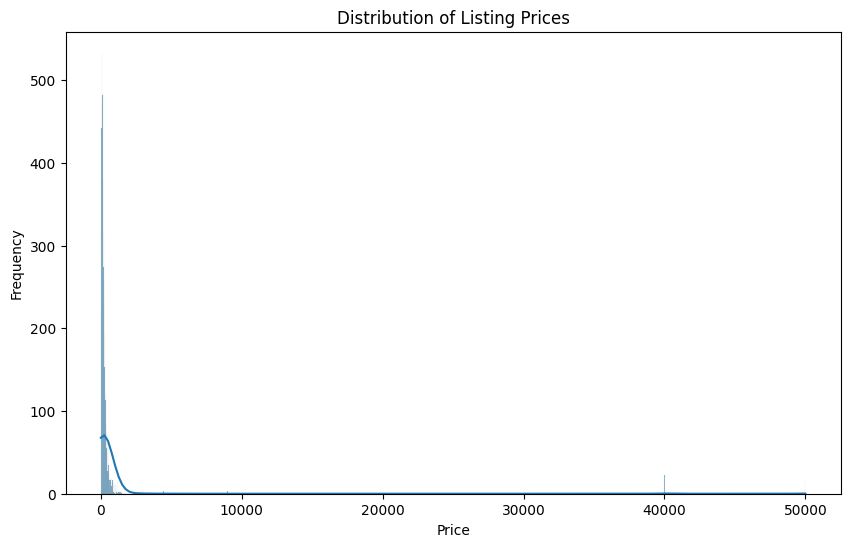

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

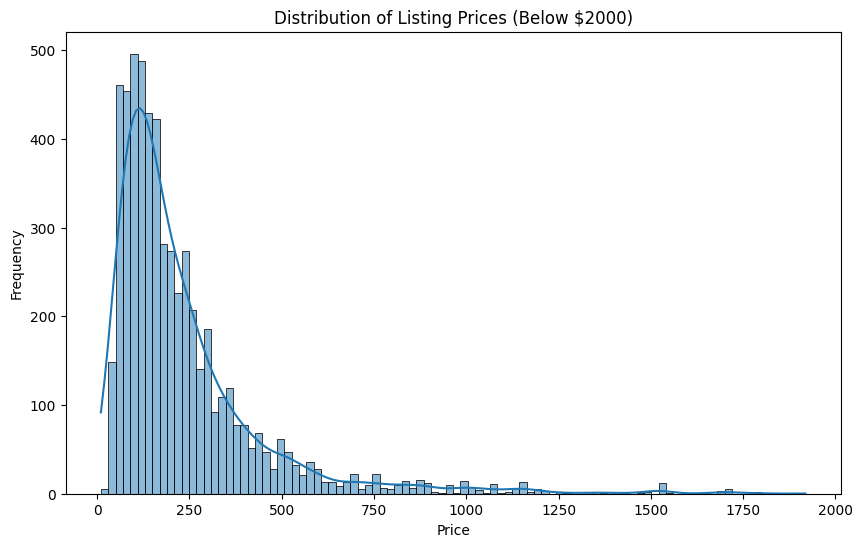

In [76]:
df_filtered = df[df['price'] < 2000]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='price', kde=True)
plt.title('Distribution of Listing Prices (Below $2000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Gráfica de barras para los tipos de alojamiento vs cantidad

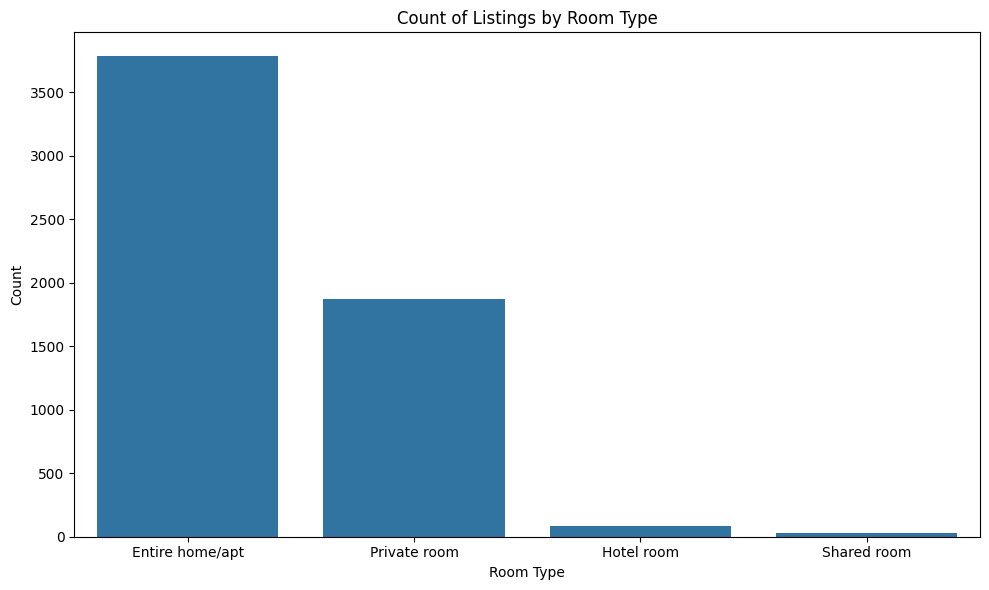

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Gráfica de barras horizontal del top 10 alcaldías

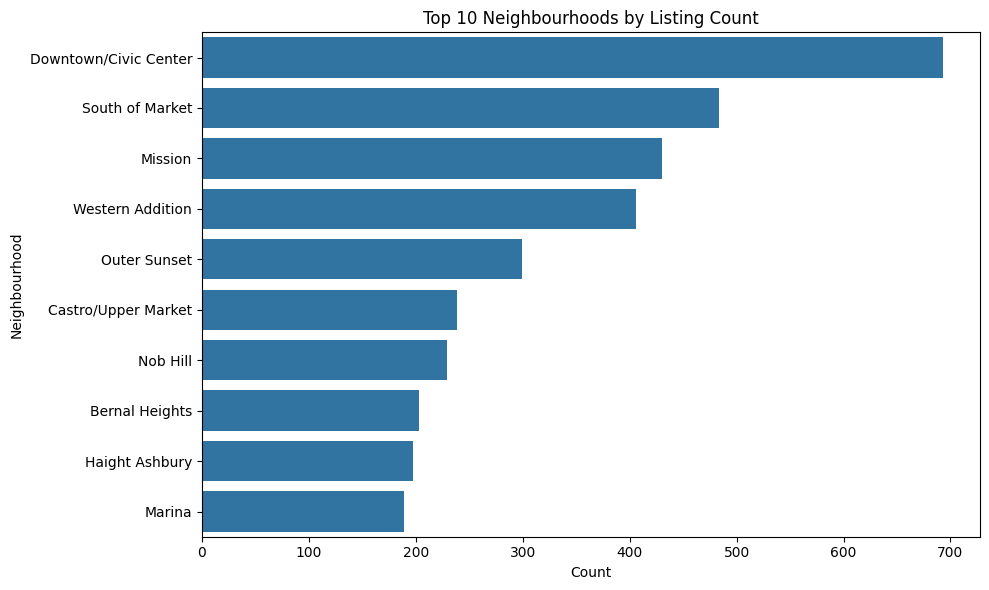

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each room type
neighbourhood_counts = df['neighbourhood'].value_counts()

# Select the top 10 neighborhoods
top_10_neighbourhoods = neighbourhood_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neighbourhoods.values, y=top_10_neighbourhoods.index)
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

## Distribución geográfica de precios **scatter_mapbox**

In [79]:
import plotly.express as px

fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="price",
                        size="price",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        zoom=10,
                        height=600,
                        title='Geographical Distribution of Listing Prices')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()